# Tutorial 0. Introduction

Welcome to the tutorial for cross decomposition analysis for neuroimaging in Python. Cross decomposition analyses look for relationships between different blocks of variables in order to make the most of all available information and make predictions about your data. These methods aim to reduce two distinct variable sets into a set of combined descriptors that may explain your data better than each of the variable sets alone. These methods are particularly used in neuroimaging to analyze associations between physiological/behavioral variables and brain structure/function.

Between unsupervised and supervised modeling, this methods has many variations. Here we will explore the most commonly used:
- Canonical correlation analysis (CCA)
- Partial Least Squares (PLS) canonical 
- PLS regression
- PLS Path Modeling (PLS-PM)

There are also some practicle considerations to take into account before selecting one of these models, this includes your data preprocessing (Tutorial 1), if your data needs to be reduced (Tutorial 2), and after you run your model in order to appropriately validate it (Tutorial 3). 

In this introduction we will first go through each of the primary cross decomposition methods with example data in order to understand how these models differ from each other and which may be the most suited for a particular dataset or question. 


## Create data based on some latent variables

see https://github.com/htwangtw/cca_primer/blob/master/cca_notebook.ipynb

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA


In [4]:
n = 100
# fix the random seed so this tutorial will always create the same results
np.random.seed(42)
l1 = np.random.normal(size=n)
l2 = np.random.normal(size=n)

In [8]:
latents_x = np.array([l1, l2, l1, l1, l2, l2]).T
latents_y = np.array([l2, l2, l1, l1+l2]).T

In [9]:
X = latents_x + np.random.normal(size=6 * n).reshape((n, 6))
Y = latents_y + np.random.normal(size=4 * n).reshape((n, 4))

In [10]:
X_train = X[:n // 2]
Y_train = Y[:n // 2]
X_test = X[n // 2:]
Y_test = Y[n // 2:]

Define plot function
(see https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_compare_cross_decomposition.html#sphx-glr-auto-examples-cross-decomposition-plot-compare-cross-decomposition-py)

In [11]:
def plot_scores(X_train_r, Y_train_r,
                X_test_r, Y_test_r):

    # 1) On diagonal plot X vs Y scores on each components
    plt.figure(figsize=(12, 8))
    plt.subplot(221)
    plt.scatter(X_train_r[:, 0], Y_train_r[:, 0], label="train",
                marker="o", c="b", s=25)
    plt.scatter(X_test_r[:, 0], Y_test_r[:, 0], label="test",
                marker="o", c="r", s=25)
    plt.xlabel("x scores")
    plt.ylabel("y scores")
    plt.title('Comp. 1: X vs Y (test corr = %.2f)' %
              np.corrcoef(X_test_r[:, 0], Y_test_r[:, 0])[0, 1])
    plt.xticks(())
    plt.yticks(())
    plt.legend(loc="best")

    plt.subplot(224)
    plt.scatter(X_train_r[:, 1], Y_train_r[:, 1], label="train",
                marker="o", c="b", s=25)
    plt.scatter(X_test_r[:, 1], Y_test_r[:, 1], label="test",
                marker="o", c="r", s=25)
    plt.xlabel("x scores")
    plt.ylabel("y scores")
    plt.title('Comp. 2: X vs Y (test corr = %.2f)' %
              np.corrcoef(X_test_r[:, 1], Y_test_r[:, 1])[0, 1])
    plt.xticks(())
    plt.yticks(())
    plt.legend(loc="best")

    # 2) Off diagonal plot components 1 vs 2 for X and Y
    plt.subplot(222)
    plt.scatter(X_train_r[:, 0], X_train_r[:, 1], label="train",
                marker="*", c="b", s=50)
    plt.scatter(X_test_r[:, 0], X_test_r[:, 1], label="test",
                marker="*", c="r", s=50)
    plt.xlabel("X comp. 1")
    plt.ylabel("X comp. 2")
    plt.title('X comp. 1 vs X comp. 2 (test corr = %.2f)'
              % np.corrcoef(X_test_r[:, 0], X_test_r[:, 1])[0, 1])
    plt.legend(loc="best")
    plt.xticks(())
    plt.yticks(())

    plt.subplot(223)
    plt.scatter(Y_train_r[:, 0], Y_train_r[:, 1], label="train",
                marker="*", c="b", s=50)
    plt.scatter(Y_test_r[:, 0], Y_test_r[:, 1], label="test",
                marker="*", c="r", s=50)
    plt.xlabel("Y comp. 1")
    plt.ylabel("Y comp. 2")
    plt.title('Y comp. 1 vs Y comp. 2 , (test corr = %.2f)'
              % np.corrcoef(Y_test_r[:, 0], Y_test_r[:, 1])[0, 1])
    plt.legend(loc="best")
    plt.xticks(())
    plt.yticks(())
    plt.show()

## Canonical Correlation Analysis

This method is useful for identifying the complex relationships between two high-dimensional sets of variables in large data sets. It simultanously evaluates two sets of variables without given preference or directionality to the relationship between these dimensions to identify common variation (using correlation) accross them (i.e there is no independent and dependent variable).  This produces several pairs of orthogonal canonical variables - canonical correlates - that each describe unique patterns of variables across the variable sets and allow more tangible interpretation of the data than non-orthogonal correlates. These canonical correlates can then be used to make new inferences about your data. This method is particularly suited for descriptive, unsupervised modeling. 

However this performs best under the following limiting conditions:
- there are more observations than variables - making it more suited to large datasets (in some cases data reduction can be used to a degree to help over come this (see Tutorial 2))
- the data is normally distributed (if appropriate data can often be normalized during preprocessing (Tutorial 1)).
- Variables must display linear relationships

If these assumptions can’t be met then there are variations of CCA that can be applied such as kernel or deep CCA, sparse CCA, or probabilistic CCA (see Wang, H.-T., J. Smallwood, J. Mourao-Miranda, C. H. Xia, T. D. Satterthwaite, D. S. Bassett and D. Bzdok (2020). "Finding the needle in a high-dimensional haystack: Canonical correlation analysis for neuroscientists." NeuroImage 216: 116745 for more info, link to tutorial 3) and/or one of the other methods below may be more suited. 

Canonical Correlation Analysis was developed prior and independently to PLS. But it turns out that CCA is a special case of PLS, and corresponds to PLS in "Mode B" in the literature.

See scikit-learn documentation for more informations. https://github.com/scikit-learn/scikit-learn/pull/17095/files?short_path=df97917#diff-df97917f68917d3a110df30940d771df

In [141]:
# CCA (PLS mode B with symmetric deflation)

cca = CCA(n_components=2)
cca.fit(X_train, Y_train)
X_train_r, Y_train_r = cca.transform(X_train, Y_train)
X_test_r, Y_test_r = cca.transform(X_test, Y_test)

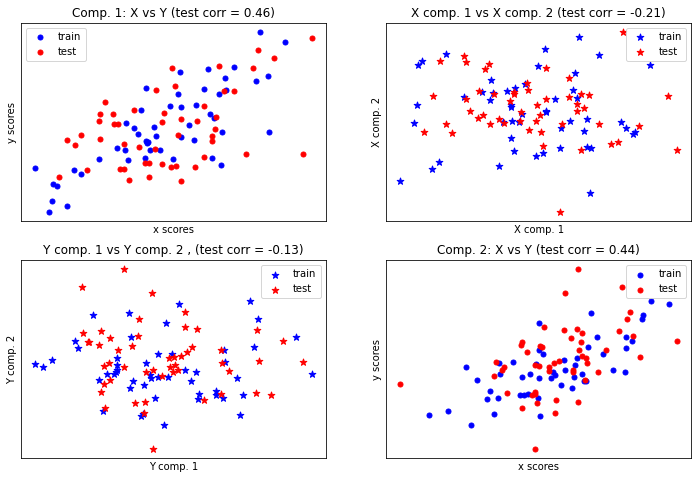

In [142]:
plot_scores(X_train_r, Y_train_r, X_test_r, Y_test_r)

## Partial Least Square Canonical

Often also refered to in the literature as PLS Correlation (PLSC). Part of the partial least squares family, this method maximises covariance over correlation but maintains the symmetry offered by CCA (i.e gives no preference to X or Y) between blocks of variables (unlike the other PLS methods). Similar to CCA, this method is suitable for high-dimensional collinear data however it may out perform CCA as the number of variables increase relative to the number of sujects. 

This method is also more readily suited for supervised modelling compared to CCA (I think?)

For a comparison of PLSC and CCA (specific to genetic and imaging data) see:
Grellmann, C., S. Bitzer, J. Neumann, L. T. Westlye, O. A. Andreassen, A. Villringer and A. Horstmann (2015). "Comparison of variants of canonical correlation analysis and partial least squares for combined analysis of MRI and genetic data." NeuroImage 107: 289-310.

For a comparision of PLSC and PLS Regression see:
Krishnan, A., L. J. Williams, A. R. McIntosh and H. Abdi (2011). "Partial Least Squares (PLS) methods for neuroimaging: A tutorial and review." NeuroImage 56(2): 455-475.

In [143]:
# Canonical (symmetric) PLS

plsca = PLSCanonical(n_components=2)
plsca.fit(X_train, Y_train)
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

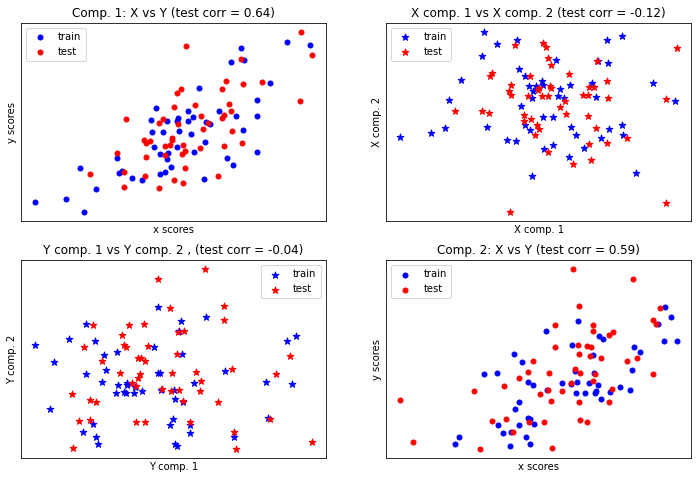

In [144]:
plot_scores(X_train_r, Y_train_r, X_test_r, Y_test_r)

## Overfitting

Link to tutorial 3 - model selection

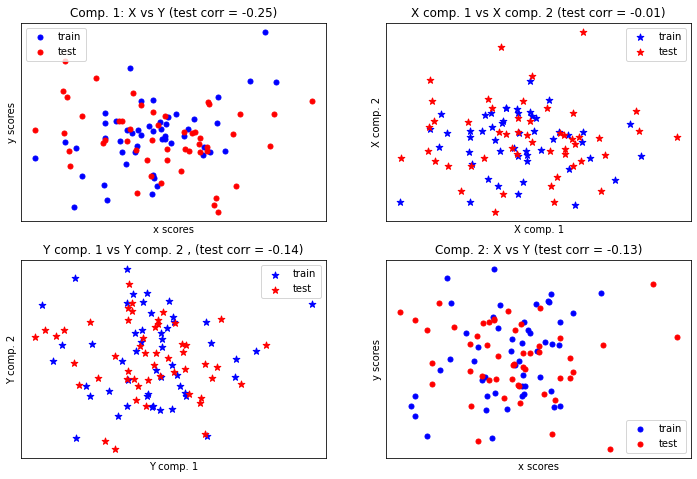

In [102]:
latents_x = np.array([l1, l1, l1, l1, l1, l1]).T
latents_y = np.array([l2, l2, l2, l2]).T

X = latents_x + np.random.normal(size=6 * n).reshape((n, 6))
Y = latents_y + np.random.normal(size=4 * n).reshape((n, 4))

X_train = X[:n // 2]
Y_train = Y[:n // 2]
X_test = X[n // 2:]
Y_test = Y[n // 2:]

cca = CCA(n_components=2)
cca.fit(X_train, Y_train)
X_train_r, Y_train_r = cca.transform(X_train, Y_train)
X_test_r, Y_test_r = cca.transform(X_test, Y_test)

plot_scores(X_train_r, Y_train_r, X_test_r, Y_test_r)

## PLS Regression

predict Y based on X (actually it is also possible with CCA and PLSCanonical, but maybe better in practice?)
directional or nonsymmetric
readily applicable to supervised (predictive) modelling

In [148]:
from sklearn.metrics import r2_score

l1 = np.random.normal(size=n)
l2 = np.random.normal(size=n)
l3 = np.random.normal(size=n)
l4 = np.random.normal(size=n)

latents_x = np.array([l1, l2, l3]).T
latents_y = np.array([l1, l2, l1+l2, l4]).T

X = latents_x + np.random.normal(size=3 * n).reshape((n, 3))
Y = latents_y + np.random.normal(size=4 * n).reshape((n, 4))

X_train = X[:n // 2]
Y_train = Y[:n // 2]
X_test = X[n // 2:]
Y_test = Y[n // 2:]

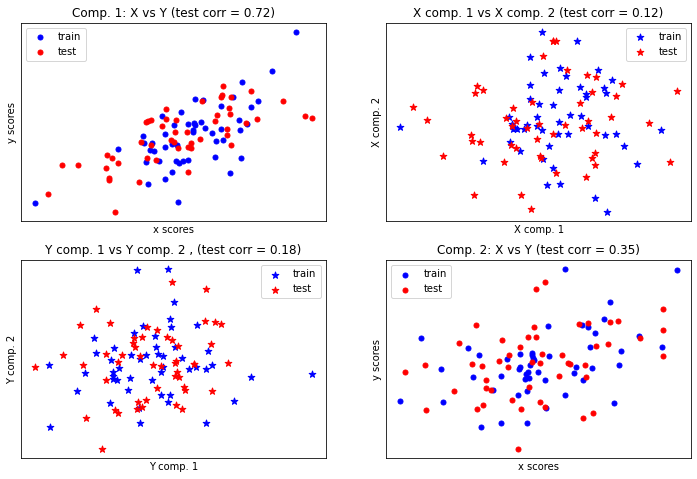

In [149]:
# PLS regression, with multivariate response, a.k.a. PLS2

pls2 = PLSRegression(n_components=2)
pls2.fit(X_train, Y_train)
Y_pred = pls2.predict(X_test)

X_train_r, Y_train_r = pls2.transform(X_train, Y_train)
X_test_r, Y_test_r = pls2.transform(X_test, Y_test)

plot_scores(X_train_r, Y_train_r, X_test_r, Y_test_r)

In [150]:
r2_score(Y_test, Y_pred, multioutput='raw_values')

array([ 0.1286097 ,  0.31186342,  0.34814866, -0.16914003])

In [151]:
print(np.round(pls2.coef_, 1))

[[ 0.7 -0.   0.9  0.2]
 [ 0.   0.6  0.9  0.2]
 [ 0.1  0.1  0.3  0.1]]


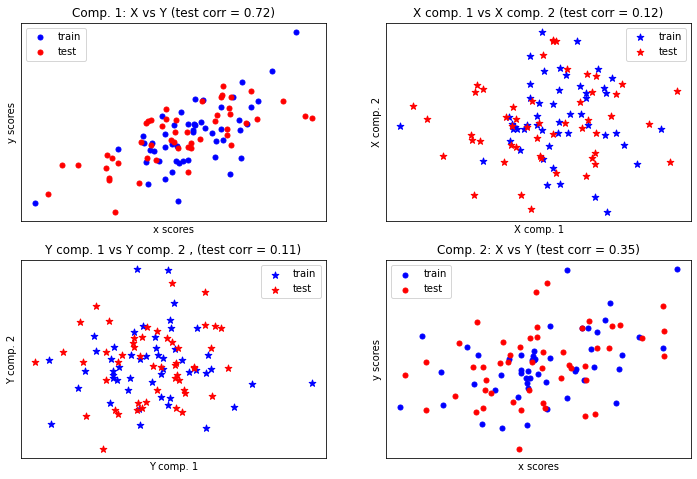

In [152]:
# PLS Canonical

plsca = PLSCanonical(n_components=2)
plsca.fit(X_train, Y_train)
Y_pred = plsca.predict(X_test)

X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

plot_scores(X_train_r, Y_train_r, X_test_r, Y_test_r)

In [153]:
r2_score(Y_test, Y_pred, multioutput='raw_values')

array([-0.19224565, -0.02525143,  0.31199748, -0.24018313])

## PLS-PM

If you have more than two blocks of variables and want to represent the relationships between them, the methods presented so far will not allow you to answer your question.

For this, you will have to use another method: Partial Least Square - Path Modeling (PLS-PM).
This method represents the relationships between matrices in the form of paths.

- **inner model:** a weight is assigned to each path to quantify the relationship between the two matrices.
- **outer model:** a weight is assigned to each variable within the blocks, and is used to compute its latent variable

Note that only one latent variable is computed per matrix, whereas in the methods presented previously, we could define the number of latent variables to be considered.

This method is extremely well documented for the library R *plspm* [here](https://www.gastonsanchez.com/PLS_Path_Modeling_with_R.pdf) and has been implemented in Python [here](https://github.com/GoogleCloudPlatform/plspm-python).

Make sure you have installed the plspm library in Python before running the codes below.

In [ ]:
### Database


In [185]:
import pandas as pd, plspm.config as c
from plspm.plspm import Plspm
from plspm.scheme import Scheme
from plspm.mode import Mode

# create dataset
l1 = np.random.normal(size=n)
l2 = np.random.normal(size=n)
l3 = np.random.normal(size=n)

latents_x = np.array([l1, l1, l1, l1, l1, l1]).T
latents_y = np.array([-l2, -l2, -l2, l3]).T
latents_z = np.array([l3, l3, l3, l3, l3]).T
latents_c = np.array([l1, l1, l2]).T

X = latents_x + np.random.normal(size=6 * n).reshape((n, 6))
Y = latents_y + np.random.normal(size=4 * n).reshape((n, 4))
Z = latents_z + np.random.normal(size=5 * n).reshape((n, 5))
C = latents_c + np.random.normal(size=3 * n).reshape((n, 3))

df = pd.DataFrame(np.concatenate([X, Y, Z, C], axis=1),
                  columns=[f'x{i}' for i in range(X.shape[1])] + \
                          [f'y{i}' for i in range(Y.shape[1])] + \
                          [f'z{i}' for i in range(Z.shape[1])] + \
                          [f'c{i}' for i in range(C.shape[1])])

In [186]:
lvs = ["X", "Y", "Z", "C"]
sat_path_matrix = pd.DataFrame(
    [[0, 0, 0, 0],
     [0, 0, 0, 0],
     [0, 0, 0, 0],
     [1, 1, 1, 0]],
    index=lvs, columns=lvs)
config = c.Config(sat_path_matrix, scaled=False)
config.add_lv_with_columns_named("X", Mode.A, df, "x")
config.add_lv_with_columns_named("Y", Mode.A, df, "y")
config.add_lv_with_columns_named("Z", Mode.A, df, "z")
config.add_lv_with_columns_named("C", Mode.A, df, "c")
plspm_calc = Plspm(df, config, Scheme.CENTROID)

In [187]:
print(plspm_calc.inner_model()['C'])

   estimate  std error         t     p>|t|
X  0.410549   0.082638  4.968039  0.000003
Y -0.423001   0.083986 -5.036553  0.000002
Z -0.090874   0.083817 -1.084205  0.280990


In [188]:
print(plspm_calc.outer_model())

      weight   loading  communality  redundancy
c0  0.363860  0.533138     0.284236    0.098897
c1  0.281545  0.337815     0.114119    0.039706
c2  0.551845  0.755172     0.570285    0.198424
x0  0.192562  0.807947     0.652778    0.000000
x1  0.139797  0.688127     0.473519    0.000000
x2  0.135738  0.793714     0.629982    0.000000
x3  0.206088  0.802702     0.644331    0.000000
x4  0.162569  0.665043     0.442282    0.000000
x5  0.105692  0.655527     0.429715    0.000000
y0  0.241381  0.743113     0.552217    0.000000
y1  0.226500  0.781787     0.611191    0.000000
y2  0.335566  0.859717     0.739113    0.000000
y3  0.178695  0.286777     0.082241    0.000000
z0  0.321781  0.818778     0.670398    0.000000
z1  0.177819  0.798270     0.637236    0.000000
z2  0.087586  0.750991     0.563988    0.000000
z3  0.093620  0.662688     0.439156    0.000000
z4  0.223703  0.811834     0.659075    0.000000


In [189]:
plspm_calc = Plspm(df, config, Scheme.CENTROID,
                   bootstrap=True, bootstrap_iterations=50)

In [190]:
print(plspm_calc.bootstrap().paths())

        original      mean  std.error  perc.025  perc.975
X -> C  0.458725  0.457603   0.108790  0.269732  0.680598
Y -> C -0.428168 -0.325762   0.279152 -0.580822  0.502099
Z -> C -0.170489 -0.053781   0.115597 -0.185533  0.173972


In [191]:
print(plspm_calc.bootstrap().loading())

    original      mean  std.error  perc.025  perc.975
x0  0.807947  0.786439   0.055745  0.670324  0.879653
x1  0.688127  0.679479   0.083593  0.485798  0.779892
x2  0.793714  0.803809   0.050951  0.682702  0.861247
x3  0.802702  0.794408   0.048112  0.715073  0.868851
x4  0.665043  0.628852   0.119525  0.397923  0.798165
x5  0.655527  0.640084   0.091674  0.400712  0.776276
y0  0.743113  0.731415   0.115952  0.472197  0.846153
y1  0.781787  0.735156   0.225602  0.407276  0.894548
y2  0.859717  0.842376   0.081909  0.703094  0.929668
y3  0.286777  0.300253   0.179614 -0.032143  0.609379
z0  0.818778  0.634628   0.295790 -0.145010  0.901761
z1  0.798270  0.667728   0.257782 -0.013238  0.877223
z2  0.750991  0.709301   0.181973  0.296580  0.880650
z3  0.662688  0.564610   0.273096 -0.079129  0.801815
z4  0.811834  0.724099   0.200527  0.152003  0.930081
c0  0.533138  0.589588   0.165110  0.251982  0.829122
c1  0.337815  0.384439   0.212920  0.060630  0.749276
c2  0.755172  0.568807   0.4